In [1]:
import mmf_setup;mmf_setup.nbinit(hgroot=False)
import numpy as np
from importlib import reload
from scipy.optimize import brentq
import homogeneous;reload(homogeneous)
from homogeneous import Homogeneous1D,Homogeneous3D
%pylab inline --no-import-all

<IPython.core.display.Javascript object>

Populating the interactive namespace from numpy and matplotlib


# Fulde-Ferrell State

In [2]:
h = Homogeneous3D(T=0, q=0)
k0 = 1.0
mu = k0**2/2
eF = mu/0.5906055
kF = np.sqrt(2*eF)
n_p = kF**3/3/np.pi**2
mus_eff = (mu,)*2
delta = 1.16220056*mus_eff[0] 
ainv, n, mu = h.get_BCS_v_n_e_in_cylindrical(
    delta=delta, mus_eff=mus_eff, k_c=100.0)
print(f"ainv={ainv}\tn=({n})\tmu=({mu})")
(n.sum(), n_p)

Computing Density Difference...
Computing Total Density...


/data/apps/conda/envs/work3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


ainv=-1.4425956741930673e-07	n=([0.03720512 0.03720512])	mu=((0.5, 0.5))


/data/apps/conda/envs/work3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.07441024775567952, 0.07441025098046673)

In [3]:
h = Homogeneous3D(T=0, q=0.9)
k0 = 1.0
mu = k0**2/2
delta = 1.16220056*mu
dmu = 1.1*delta
eF = mu/0.5906055
kF = np.sqrt(2*eF)
mus_eff = (mu+dmu, mu-dmu)
ainv, n, mu = h.get_BCS_v_n_e_in_cylindrical(
    delta=delta, mus_eff=mus_eff, k_c=100.0)
print(f"ainv={ainv}\tn=({n})\tmu=({mu})")

/data/apps/conda/envs/work3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


Computing Density Difference...


/Users/mforbes/work/others/quantum-fermion-theories/quantum-turbulence/homogeneous.py:54: UserWarning: Density Difference integral did not converge: res, err = 0.06426339804174305, 2.953331421757204e-06
  f"{int_name} integral did not converge: res, err = {res}, {err}")


Computing Total Density...
ainv=2.7106966770761347	n=([0.01506111 0.01180549])	mu=((1.139210308, -0.13921030800000012))


/Users/mforbes/work/others/quantum-fermion-theories/quantum-turbulence/homogeneous.py:54: UserWarning: Total Density integral did not converge: res, err = 0.5303254336821379, 1.047182937451583e-06
  f"{int_name} integral did not converge: res, err = {res}, {err}")


# Special Momenta

$$
  \epsilon_\pm = \frac{\epsilon_a \pm \epsilon_b}{2}, \qquad
  \mu_{\pm} = \frac{\mu_a \pm \mu_b}{2}\\
  \epsilon_- = \frac{2\hbar^2qk_z }{m}- \mu_-, \qquad
  \epsilon_+ = \frac{\hbar^2k_z^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+,\\
  \omega_{\pm} = \epsilon_- \pm \sqrt{\epsilon_+^2 + \Delta^2}
$$

The special momenta occur when $\omega_{\pm}=0$ or $\epsilon_- = \mp \sqrt{\epsilon_+^2+\Delta^2}$.

$$
  \epsilon_-^2 = \epsilon_+^2 + \Delta^2
$$

In 3d case:
$$
\epsilon_+ = \frac{\hbar^2k_z^2}{2m}+\frac{\hbar^2k_{\perp}^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+,\\
$$

# To Do For Chunde:

Derive integrals for FF state.

* $P = \mu_+n_+ + \mu_- n_- - \mathcal{E}$.


* You can easily compute $P(\mu_+, \mu_-, \Delta, q)$ and $a_s^{-1}(\mu_+, \mu_-, \Delta, q)$.
* Solve $a_s^{-1} = a_s^{-1}(\mu_+, \mu_-, \Delta, q)$ to get $\Delta(\mu_+,\mu_-, q, a_s^{-1})$. (Recall, there may be no solution - you must also always consider the normal phase $\Delta=0$.)
* Now maximize, including $P(\mu_+, \mu_-, \Delta=0, q)$:

  $$
    \max_{q} P(\mu_+, \mu_-, a_s^{-1}, q).
  $$

## BdG 
We start with the issue of regularization.  The $T=0$ equations in $d$ dimensions can be expressed in terms of the gap $\Delta$ and effective chemical potential $\mu_{\text{eff}} = \mu_0 + g_cn_+/2$ where $g_c>0$ represents an attractive interaction:

$$
  \Delta = g_c \nu_c, \qquad
  \mu_{eff}-\mu_0=g_cn_+/2\qquad
  \epsilon_+ = \frac{\hbar^2k^2}{2m} - \mu_{\text{eff}}, \qquad
  \mathcal{E} = \frac{E}{V} 
              = \frac{\hbar^2\tau_c}{2m} - g_c(n_an_b+\nu_c^\dagger\nu_c)
              = \frac{\hbar^2\tau_c}{2m} - \Delta^\dagger\nu_c - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2},
$$

through the following integrals:
  
\begin{align}
  \nu_c &= \int_{c}\frac{\d^d{k}}{(2\pi)^d}\;\frac{\Delta}{2\sqrt{\epsilon_+^2 + \Delta^2}}
  &&\sim \int_{c}\frac{\d^d{k}}{(2\pi)^d}\;\frac{m\Delta}{\hbar^2 k^2},\tag{1}\\
  \tau_c &= \int_c\frac{\d^d{k}}{(2\pi)^d}\; k^2
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  &&\sim \int_c\frac{\d^d{k}}{(2\pi)^d}\; 
  \frac{2m^2\abs{\Delta}^2}{\hbar^4 k^2},\tag{2}\\
  n_+ &= \int_c\frac{\d^d{k}}{(2\pi)^d}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  &&\sim \int_c\frac{\d^d{k}}{(2\pi)^d}\; 
  \frac{2m^2\abs{\Delta}^2}{\hbar^4 k^4}. \tag{3}\\
  \kappa_c &=\int_c\frac{\d^d{k}}{(2\pi)^d}\;\left(\frac{\hbar^2\tau_c}{2m} - \Delta^\dagger \nu_c\right) 
  &&\sim \int_c\frac{\d^d{k}}{(2\pi)^d}\;\frac{2m^2\abs{\Delta}^2\mu_{\text{eff}}}{\hbar^4 k^4},\tag{4}
\end{align}

The total kinetic energy is $\tau_+=\tau_a + \tau_b$:

$$
\tau_+ = \int_c\frac{\d^d{k}}{(2\pi)^d}((k+q)^2+(-k+q)^2)\left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]\\
\tau_+ = 2\int_c\frac{\d^d{k}}{(2\pi)^d}(k^2+q^2)\left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
$$

## Inverse scattering length

\begin{align}
\frac{1}{v_0} 
  &=\frac{m}{4\pi\hbar^2 a}- \frac{1}{2} \int_c\frac{d^3k}{(2\pi)^3}{\frac{1}{\frac{\hbar^2k^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+}}\\
   &=\frac{m}{4\pi\hbar^2 a}- \Lambda\\
\Lambda 
&= \frac{1}{2} \int_c\frac{d^3k}{(2\pi)^3}{\frac{1}{\frac{\hbar^2k^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+}}\\
&=\frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{k_c+k_0}{k_c-k_0}\right)
\end{align}
where
$$
  \frac{\hbar^2k_0^2}{2m} - (\mu_+ - \frac{\hbar^2q^2}{2m}) = 0, \qquad
  \frac{\hbar^2k_c^2}{2m} - (\mu_+ - \frac{\hbar^2q^2}{2m})= E_c
$$

\begin{align}
\frac{m}{4\pi\hbar^2}a(\mu_+,\mu_-,\delta,q)^{-1} &=\frac{1}{v_0}- \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)
\end{align}
where
$$
  \frac{k_0}{k_c} = \sqrt{\frac{\mu_+ - \frac{\hbar^2q^2}{2m}}{E_c + \mu_+ - \frac{\hbar^2q^2}{2m}}}
$$


\begin{align}
\frac{1}{v_0} &= \frac{m}{4\pi\hbar^2}a(\mu_+,\mu_-,\delta,q)^{-1} + \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)\\
\frac{1}{\Delta}\nu_c &= \frac{m}{4\pi\hbar^2}a(\mu_+,\mu_-,\delta,q)^{-1} + \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)\\
\end{align}

Substituting the integral for $\nu_c$ yields:

\begin{align}
\int_{c}\frac{dk^3}{(2\pi)^3}\frac{1}{2\sqrt{\epsilon_+^2 + \Delta^2}}\left(f(\omega_-)-f(\omega_+)\right) &= \frac{m}{4\pi\hbar^2}a^{-1}(\mu_+,\mu_-,\delta,q) + \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)\tag{5}\\
\end{align}

## Pressure integral

### The total energy density

\begin{align}
\mathcal{E} &= \frac{E}{V}= \frac{\hbar^2\tau_+}{2m} - g_c(n_an_b+\nu_c^\dagger\nu_c) \\
              &= \frac{\hbar^2\tau_+}{2m} - \Delta^\dagger\nu_c - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}\\
              &= - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2} +\frac{\hbar^2\tau_+}{2m} - \Delta^\dagger\nu_c \\
              \mathcal{E}&= \frac{\hbar^2}{2m}\int_c\frac{\d^3{k}}{(2\pi)^3}k^2
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right] - \Delta^\dagger\int_{c}\frac{\d^3{k}}{(2\pi)^3}\frac{\Delta}{2\sqrt{\epsilon_+^2 + \Delta^2}} - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}\\
    &= \int_c\frac{\d^3{k}}{(2\pi)^3}
    \left[\frac{\hbar^2k^2}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right] - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2},
\end{align}

### Grand Canonical Potential

\begin{align}
P(q)&=
\mu_+n_+ + \mu_-n_- - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}-( \frac{\hbar^2\tau_c}{2m} - \Delta^\dagger\nu_c )\\
&=\mu_+n_+ + \mu_- n_- - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}- \int_c\frac{k_{\perp}dk_{\perp}dk_z}{(2\pi)^2}
\left[\frac{\hbar^2(k_{\perp}^2+(k_z+q)^2)}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right]\\
&=\mu_+\int_c\frac{d^3k}{(2\pi)^3}\left(1 - \frac{\epsilon^+_k}{E_k}\bigl(f(\omega_-) - f(\omega_+)\bigr)\right) + \mu_- \int\frac{\d^3{k}}{(2\pi)^3}\bigl(f(\omega_+) - f(-\omega_-)\bigr) - \int_c\frac{k_{\perp}dk_{\perp}dk_z}{(2\pi)^2}
\left[\frac{\hbar^2(k_{\perp}^2+(k_z+q)^2)}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right] \\
&=\int_c\frac{d^3k}{(2\pi)^3}
\left[\mu_+\left(1 - \frac{\epsilon^+_k}{E_k}\bigl(f(\omega_-) - f(\omega_+)\bigr)\right) + \mu_- \bigl(f(\omega_+) - f(-\omega_-)\bigr) - \frac{\hbar^2k^2}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right]\tag{6}\\  
\end{align}

## Maximize $P(\mu_+,\mu_-,\Delta,q)$
For any given $\mu s$ and scattering length, to maximize $P$ is equivalent to have $\frac{\partial P}{\partial q} = 0$, and $q$ shows up in any $k_z$, so in any part of the equation depends on $k$:

In [137]:
import FuldeFerrelState
import tf_completion as tf
reload(FuldeFerrelState)
reload(tf_completion)
from FuldeFerrelState import get_pressure,get_inv_scattering_len,get_n_m,get_n_p,get_kappa
from tf_completion import *

In [138]:
qs = np.linspace(0,.0010,5)
np.random.seed(1)
m, hbar, kF = 1 + np.random.random(3)
eF = (hbar*kF)**2/2/m
nF = kF**3/3/np.pi**2
mu = 0.59060550703283853378393810185221521748413488992993*eF
delta = 0.68640205206984016444108204356564421137062514068346*eF
args = dict(mu_a=mu, mu_b=mu, delta=delta, m_a=m, m_b=m, hbar=hbar, T=0.0)

In [139]:
np.random.seed(1)
m, hbar, kF = 1 + np.random.random(3)
eF = (hbar*kF)**2/2/m
nF = kF**3/3/np.pi**2
mu = 0.59060550703283853378393810185221521748413488992993*eF
delta = 0.68640205206984016444108204356564421137062514068346*eF
dmu = 0.9 * delta
mu_a,mu_b= mu + dmu / 2,mu - dmu / 2
args = dict(mu_a=mu + dmu / 2, mu_b=mu - dmu / 2, delta=delta, m_a=m, m_b=m, hbar=hbar, T=0.0)

In [140]:
qs = np.linspace(0.1,1.5,10)
ps = [get_pressure(mu_a = mu_a,mu_b=mu_b,delta=delta,m=m,T=0,q=q).n for q in qs]


c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
c:\users\chunde\appdata\local\programs\pyt

Text(0.5, 1.0, 'mu_a=0.9395245016605018 mu_b=0.29426474936037694')

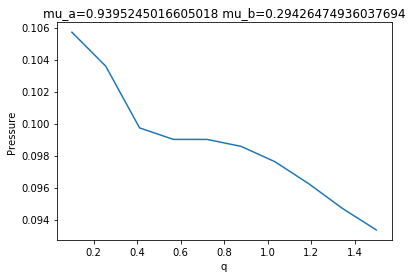

In [141]:
plt.plot(qs,ps)
plt.ylabel('Pressure')
plt.xlabel('q')
plt.title(f"mu_a={mu_a} mu_b={mu_b}")

### $\tilde{C}$ vs delta

In [144]:
np.random.seed(1)
m, hbar, kF = 1 + np.random.random(3)
eF = (hbar*kF)**2/2/m
nF = kF**3/3/np.pi**2
mu = 0.59060550703283853378393810185221521748413488992993*eF
delta = .68640205206984016444108204356564421137062514068346*eF
args = dict(mu_a=mu, mu_b=mu, m_a=m,m_b=m, hbar=hbar, T=0.0)
deltas = np.linspace(0, mu*2, 10)
Cs = [tf_completion.compute_C(d=3, delta=delta,q=0, **args) for delta in deltas]

E:\Projects\Physics\quantum-fermion-theories\quantum-turbulence\tf_completion.py:310: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
E:\Projects\Physics\quantum-fermion-theories\quantum-turbulence\tf_completion.py:311: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


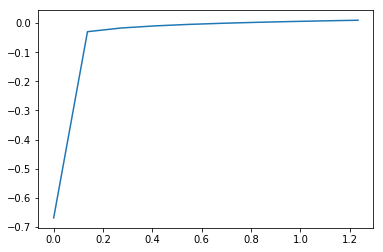

In [145]:
Cns =[c.n for c in Cs]
plt.plot(deltas, Cns)

## Thermodynamic Relations
The pressure of the system is given as:
\begin{align}
P(q)&=\mu_+n_+ + \mu_-n_- -( \frac{\hbar^2\tau_c}{2m} - \Delta^\dagger\nu_c )\\
&=\mu_+n_+ + \mu_-n_- -\kappa\\
\end{align}
the following two relation satisfied:
* $n_a = \frac{\partial p(\mu_a,\mu_b)}{\partial \mu_a}$
* $n_b = \frac{\partial p(\mu_a,\mu_b)}{\partial \mu_b}$

However, a bit careful thought,it may not be that simply, the densities $n_+$, $n_-$ and $\kappa$ also depend on $\mu_a$, $\mu_b$:
\begin{align}
\frac{\partial P}{\partial \mu_a} 
&= \frac{\partial \mu_+}{\partial \mu_a}n_+ + \frac{\partial n_+}{\partial \mu_a}\mu_+  \frac{\partial \mu_-}{\partial \mu_a}n_- + \frac{\partial n_-}{\partial \mu_a}\mu_- + \frac{\partial \kappa}{\partial \mu_a}\\
&=\frac{1}{2}n_+ +\frac{1}{2}n_- +  \frac{\partial n_+}{\partial \mu_a}\mu_+ + \frac{\partial n_-}{\partial \mu_a}\mu_- + \frac{\partial \kappa}{\partial \mu_a}\\
&=n_a +  \overbrace{\frac{\partial n_+}{\partial \mu_a}\mu_+ + \frac{\partial n_-}{\partial \mu_a}\mu_- + \frac{\partial \kappa}{\partial \mu_a}}^{\text{may not vanish}}\\
\end{align}

<font color='red'>No, I miss couple of points:</font>
* The $\Delta$ also depends on $\mu s$
* The energy density $\kappa$ may not be used in the calculation as it's reqularized version.

In [146]:
def get_delta(mu_a, mu_b, m_a, m_b, T=0, hbar = 1, k_c = 10, q=0):
    def f(delta):        
        C = tf.compute_C(mu_a = mu_a,mu_b = mu_b,delta = delta,m_a = m_a,  m_b=m_b,d=3, hbar= hbar,T=T, q=q, k_c= k_c)
        return C.n
    return brentq(f, 0.5, 1.0)

def get_pressure(mu_a, mu_b, delta=None, m=1, hbar=1, T=0, q=0):
    if delta is None:
        delta = get_delta(mu_a= mu_a, mu_b=mu_b, m_a=m, m_b=m,T=T, q=q)
    args = dict(mu_a=mu_a, mu_b=mu_b, delta=delta,hbar=hbar,q=q,T=0.0)
    mu_p,mu_m = (mu_a + mu_b)/2, (mu_a - mu_b)/2
    args['m_a']=m
    args['m_b']=m
    n_p = tf.integrate_q(tf.n_p_integrand,d=3, **args)
    n_m = tf.integrate_q(tf.n_m_integrand,d=3, **args)
    kappa = 0#tf.integrate_q(tf.kappa_integrand,d=3,k_c=10.0, **args)
    pressure = mu_p * n_p + mu_m * n_m - kappa
    return pressure


In [151]:
np.random.seed(1)
m, hbar, kF = 1 + np.random.random(3)
eF = (hbar*kF)**2/2/m
nF = kF**3/3/np.pi**2
mu = 0.59060550703283853378393810185221521748413488992993*eF
q = 0
delta = None# 0.68640205206984016444108204356564421137062514068346*eF
delta = get_delta(mu_a= mu, mu_b=mu, m_a=m, m_b=m, q=q)
args = dict(mu_a=mu, mu_b=mu, delta=delta, m_a=m, m_b=m, hbar=hbar, T=0.0)
n_p = tf.integrate_q(tf.n_p_integrand, d=3, q=q,**args)
n_m = tf.integrate_q(tf.n_m_integrand, d=3, q=q,**args)
dmus = np.linspace(0,1,10)
n_ps = [tf.integrate_q(tf.n_p_integrand, q=q,mu_a=mu + dmu * mu, mu_b=mu, delta=delta, m_a=m, m_b=m, hbar=hbar).n for dmu in dmus]

c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


### $n_p$ vs $\mu$

Text(0, 0.5, '$n_p$')

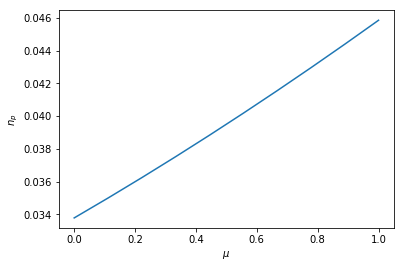

In [158]:
plt.plot(dmus,n_ps)
plt.xlabel("$\mu$")
plt.ylabel("$n_p$")

### Fix the density and set $\kappa=

In [162]:
np.random.seed(1)
m, hbar, kF = 1 + np.random.random(3)
eF = (hbar*kF)**2/2/m
nF = kF**3/3/np.pi**2
mu = 0.59060550703283853378393810185221521748413488992993*eF
q = 0
delta = None# 0.68640205206984016444108204356564421137062514068346*eF
delta = get_delta(mu_a= mu, mu_b=mu, m_a=m, m_b=m, q=q)
args = dict( d=3, delta=delta,mu_a=mu,mu_b=mu, m_a=m, m_b=m, hbar=hbar,q=q, T=0.0)

In [163]:
np = tf.integrate_q(tf.n_p_integrand, **args)
nm = tf.integrate_q(tf.n_m_integrand, **args)

c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


In [164]:
def get_p(mu_a,mu_b):
    mu_p,mu_m = (mu_a + mu_b)/2, (mu_a - mu_b)/2
    return mu_p * np + mu_m * nm

In [166]:
dmu = 1e-10
pa1 = get_p(mu+dmu,mu)
pa2 = get_p(mu-dmu,mu)
pb1 = get_p(mu,mu+dmu)
pb2 = get_p(mu,mu-dmu)
na_ = (pa1-pa2)/2/dmu
nb_ = (pb1-pb2)/2/dmu
na_,nb_,(np+nm)/2,(np-nm)/2

(0.016890482068543378+/-3.281385747497256e-08,
 0.016890482068543378+/-3.281385747497256e-08,
 0.01689049612168432+/-3.281385747497256e-08,
 0.01689049612168432+/-3.281385747497256e-08)

In [ ]:
n_p = tf.integrate_q(tf.n_p_integrand, mu_a=mu,mu_b = mu,**args)
n_m = tf.integrate_q(tf.n_m_integrand, mu_a=mu,mu_b = mu,**args)
n_a = (n_p + n_m)/2
n_b = (n_p - n_m)/2
dmu = 1e-10
n0 = get_pressure(mu_a=mu, mu_b=mu, **args)
na1 = get_pressure(mu_a = mu - dmu,mu_b=mu, **args)
na2 = get_pressure(mu_a = mu + dmu,mu_b=mu, **args)
nb1 = get_pressure(mu_a = mu,mu_b=mu - dmu, **args)
nb2 = get_pressure(mu_a = mu,mu_b=mu + dmu, **args)
n_a_ = (na2 - na1)/2/dmu
n_b_ = (nb2 - nb1)/2/dmu
print((n_a,n_b),(n_a_,n_b_))
assert np.allclose(n_a,n_a_)
assert np.allclose(n_b,n_b_)

# Mixed states

$$
  \mu = \pdiff{\mathcal{E}(n)}{n}, \qquad
  n = \pdiff{P(\mu)}{\mu}, \qquad
  P = \mu n - \mathcal{E}, \qquad
  \mathcal{E} = \mu n - P,\\
  \mathcal{E}_1 = n^2, \qquad
  \mathcal{E}_2 = 1 + (n-1)^2\\
  \mu_1 = 2n, \qquad \mu_2 = 2(n-1)\\
  n_1 = \mu/2, \qquad n_2 = 1+\mu/2\\
  P_1 = \frac{\mu^2}{4}, \qquad
  P_2 = \mu - 1 + \frac{\mu^2}{4}
$$

First order transition at $\mu_c = 1$, $P=\mu_c^2/4$, with $n \in (\mu/2, 1 + \mu/2)$ and
$\mathcal{E} = \mu_c n - \mu_c^2/4$.

In [ ]:
n = np.linspace(0,2,100)
mu_c = 1
E1 = n**2
E2 = 1+(n-1)**2
n_mix = np.linspace(mu_c/2, 1+mu_c/2, 100)
E_mix = mu_c*n_mix - mu_c**2/4

plt.subplot(121)
plt.plot(n, E1, n, E2)
plt.plot(n_mix, E_mix, '-k')
plt.xlabel(r'$n$'); plt.ylabel(r'$\mathcal{E}$');

mu = np.linspace(0, 2, 100)
P1 = mu**2/4
P2 = mu**2/4 + mu - 1
ax = plt.subplot(122); ax.yaxis.tick_right()
plt.plot(mu, P1, mu, P2)
plt.plot(mu, np.maximum(P1, P2), 'k')
plt.xlabel(r'$\mu$'); plt.ylabel('$P$');

# FF States

In [ ]:
Delta = 0.1
k_z = np.linspace(0, 2, 100)
k_perp = 0.9
q = .0
kF = 1.0

dmu = 1.1*Delta
E = np.sqrt(((k_z**2 + k_perp**2 + q**2)/2 - kF**2/2)**2 + Delta**2)
Em = 2*q*k_z - dmu
wp = Em + E
wm = Em - E

plt.plot(k_z, wp)
plt.plot(k_z, wm)
plt.axhline(0, ls=':', c='y')


# Scattering length check in unitary case

In [ ]:
h3 = Homogeneous3D(T=0.0)
k0 = 1.0
mu = k0**2/2
eF = mu/0.5906055
kF = np.sqrt(2*eF)
n_p = kF**3/3/np.pi**2
mus_eff = (mu,)*2
delta =  1.16220056*mus_eff[0]
k_c = 10.0
Lambda = h3.get_inverse_scattering_length(mus_eff=mus_eff, delta=delta, k_c=k_c)/4/np.pi
Lambda, -k_c/2/np.pi**2*k0/2/k_c*np.log((k_c+k0)/(k_c-k0)),k0**3/3/np.pi**2 

In [ ]:
kc =np.linspace(1,20,20)
plt.plot(kc,[h3.get_inverse_scattering_length(mus_eff=mus_eff, delta=delta, k_c=k)/4/np.pi for k in kc])

In [ ]:
kc =np.linspace(20,200,20)
plt.plot(kc,[h3.get_inverse_scattering_length(mus_eff=mus_eff, delta=delta, k_c=k)/4/np.pi for k in kc])